In [19]:
#Попробуйте реализовать нейронную сеть архитектуры LSTM на numpy

import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

In [20]:
n_unique_words = 10000 # cut texts after this number of words
maxlen = 200
batch_size = 128

In [21]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=n_unique_words)

17464789/17464789 [==============================] - 0s 0us/step


In [22]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [23]:
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history=model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=12,
           validation_data=[x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/12
196/196 [==============================] - 223s 1s/step - loss: 0.4600 - accuracy: 0.7789 - val_loss: 0.3248 - val_accuracy: 0.8615
Epoch 2/12
196/196 [==============================] - 218s 1s/step - loss: 0.2473 - accuracy: 0.9043 - val_loss: 0.3358 - val_accuracy: 0.8694
Epoch 3/12
196/196 [==============================] - 218s 1s/step - loss: 0.1816 - accuracy: 0.9336 - val_loss: 0.3777 - val_accuracy: 0.8587
Epoch 4/12
196/196 [==============================] - 218s 1s/step - loss: 0.1406 - accuracy: 0.9496 - val_loss: 0.3994 - val_accuracy: 0.8580
Epoch 5/12
196/196 [==============================] - 235s 1s/step - loss: 0.1157 - accuracy: 0.9599 - val_loss: 0.4273 - val_accuracy: 0.8601
Epoch 6/12
196/196 [==============================] - 219s 1s/step - loss: 0.0856 - accuracy: 0.9716 - val_loss: 0.4949 - val_accuracy: 0.8577
Epoch 7/12
196/196 [==============================] - 217s 1s/step - loss: 0.0568 - accuracy: 0.9810 - val_loss: 0.5703 - val_accuracy: 0.8578

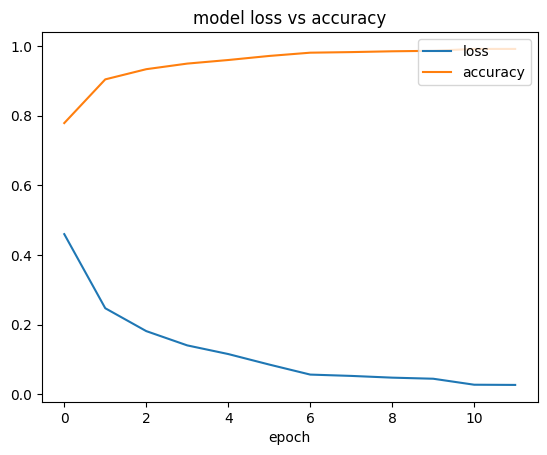

In [25]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()

Здесь мы можем видеть производительность bi-LSTM. Теперь ясно, что линия точности все время близка к единице, а потери практически равны нулю. Таким образом, модель хорошо зарекомендовала себя на тренировках.

Cоздали базовую модель BI-LSTM для классификации текста. Мы можем использовать её с текстовыми данными, аудиоданными, данными временных рядов и т.д. для получения лучших результатов.


